# Data: Bank Marketing
## O seguinte desafio pretende resolver uma série de perguntas associadas à base de dados  que pode ser encontrada nos sites:

## Fonte oficial do ​ dataset : ​ ​ https://archive.ics.uci.edu/ml/datasets/bank+marketing
## Dados: ​ https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

Arquivos incluídos no link acima:

1. bank. csv:​​ uma versão reduzida do conjunto de dados;
2. bank-full.csv:​​ o conjunto completo;
3. bank-names.txt:​​ com a descrição

As bases de dados encontran-se associadas aos artigos :

1. S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

2. S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS.

Os métodos de análise de sensibilidade e random forrest usados em > 1. podem ser vistos em:

3. Paulo Cortez, Mark J. Embrechts, Using sensitivity analysis and visualization techniques to open black box data mining models, Information Sciences 225 (2013) 1–17.


## Inicialmente é realizada  uma análise preliminar dos dados, empregando histogramas.

## As graficas são elaboradas usando as librarias e dados a seguir:

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
### arquivo csv 
col_df = pd.read_csv('/media/andres/dados1/semantix_teste/desafio/bank-full.csv',sep=';')
print("Conjunto de dados a serem usados na análise:")
print(col_df)
plt.close("all")


Conjunto de dados a serem usados na análise:
       age            job   marital  education default  balance housing loan  \
0       58     management   married   tertiary      no     2143     yes   no   
1       44     technician    single  secondary      no       29     yes   no   
2       33   entrepreneur   married  secondary      no        2     yes  yes   
3       47    blue-collar   married    unknown      no     1506     yes   no   
4       33        unknown    single    unknown      no        1      no   no   
5       35     management   married   tertiary      no      231     yes   no   
6       28     management    single   tertiary      no      447     yes  yes   
7       42   entrepreneur  divorced   tertiary     yes        2     yes   no   
8       58        retired   married    primary      no      121     yes   no   
9       43     technician    single  secondary      no      593     yes   no   
10      41         admin.  divorced  secondary      no      270     yes   n

# construção das classes para os histogramas 

In [62]:
class Dados_iniciais:
    
    def __init__(self, col_df):
        self.col_df = col_df
        self.col_df_grouped = col_df.groupby("y")
        self.nome_classe_nao = "no"
        self.nome_classe_sim = "yes"
        self.col_df_grouped_nao = self.col_df_grouped.get_group(self.nome_classe_nao)
        self.col_df_grouped_sim = self.col_df_grouped.get_group(self.nome_classe_sim)

    def plot_histograma_continuo(self, nome_carateristica, bin_tamanho):
        plt.figure()
        plt.hist(self.col_df_grouped_nao[nome_carateristica], bins=bin_tamanho, label=self.nome_classe_nao)
        plt.hist(self.col_df_grouped_sim[nome_carateristica], bins=bin_tamanho, label=self.nome_classe_sim)
        plt.legend()
        plt.title("Histograma de Carateristicas - "+nome_carateristica)
        plt.xlabel("Valores Carateristicos")
        plt.ylabel("grouped")

    def plot_histogram_categorical(self, nome_carateristica):
        carateristica_df = pd.DataFrame()
        carateristica_df["no"] = self.col_df_grouped_nao[nome_carateristica].value_counts()
        carateristica_df["yes"] = self.col_df_grouped_sim[nome_carateristica].value_counts()
        
        carateristica_df.plot(kind='bar')
        plt.title("Histograma de Carateristicas - "+nome_carateristica)
        plt.ylabel("grouped")
        plt.xlabel("Valores unicos carateristicos")
        plt.tight_layout()
# uso da classe dados iniciais        
Dados_iniciais_obj = Dados_iniciais(col_df)

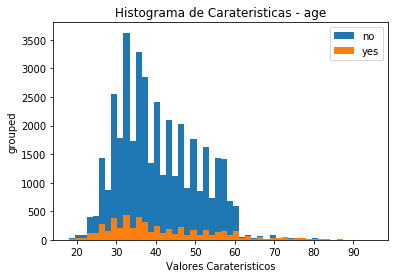

In [63]:
# 1 age	

Dados_iniciais_obj.plot_histograma_continuo("age", 50)




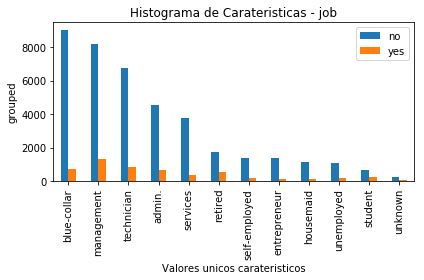

In [64]:
# 2 job	

Dados_iniciais_obj.plot_histogram_categorical("job")


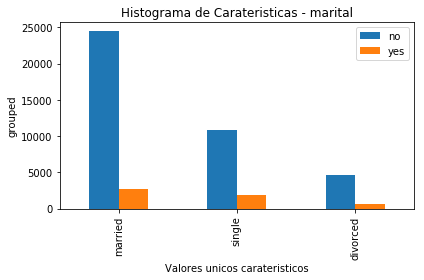

In [65]:
# 3 marital

Dados_iniciais_obj.plot_histogram_categorical("marital")




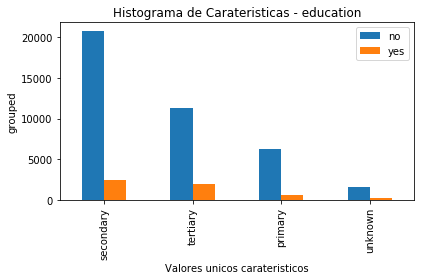

In [66]:
# 4 education

Dados_iniciais_obj.plot_histogram_categorical("education")




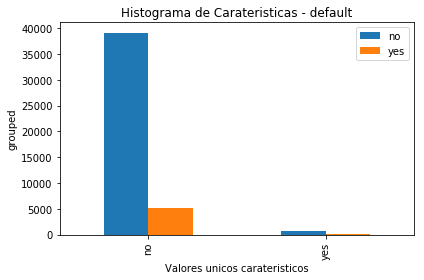

In [67]:
# 5 default	

Dados_iniciais_obj.plot_histogram_categorical("default")




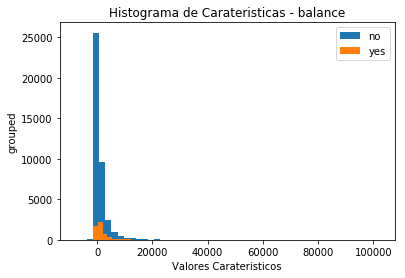

In [68]:
# 6 balance	

Dados_iniciais_obj.plot_histograma_continuo("balance", 50)




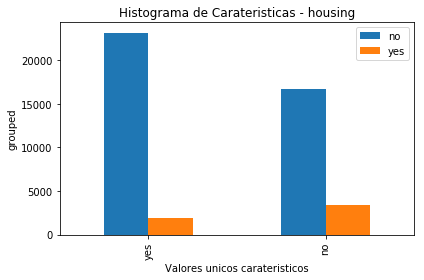

In [69]:
# 7 housing	

Dados_iniciais_obj.plot_histogram_categorical("housing")




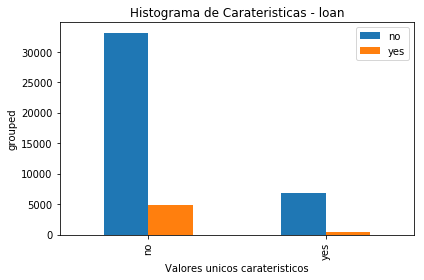

In [70]:
# 8 loan	

Dados_iniciais_obj.plot_histogram_categorical("loan")




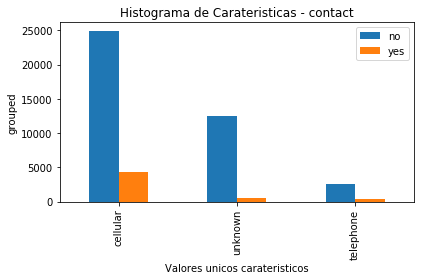

In [71]:
# 9 contact	

Dados_iniciais_obj.plot_histogram_categorical("contact")




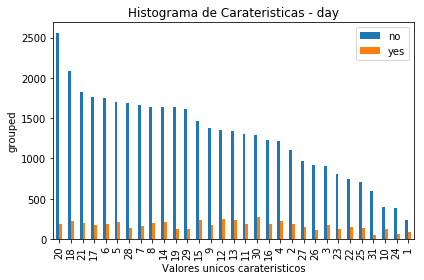

In [72]:
# 10 day	

Dados_iniciais_obj.plot_histogram_categorical("day")




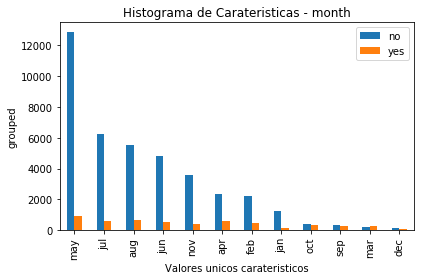

In [73]:
# 11 month	

Dados_iniciais_obj.plot_histogram_categorical("month")




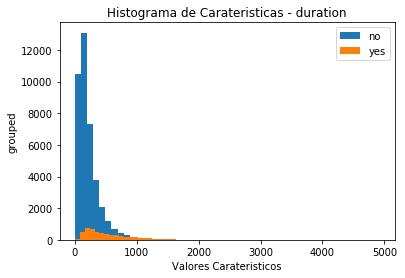

In [74]:
# 12 duration	

Dados_iniciais_obj.plot_histograma_continuo("duration",50)




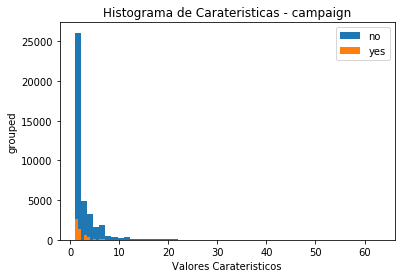

In [75]:
# 13 campaign	

Dados_iniciais_obj.plot_histograma_continuo("campaign", 50)




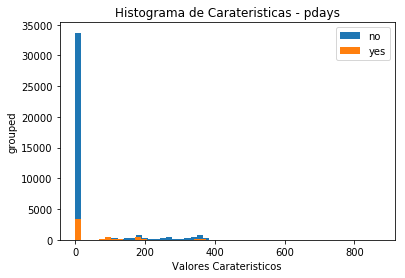

In [76]:
# 14 pdays	
Dados_iniciais_obj.plot_histograma_continuo("pdays", 50)




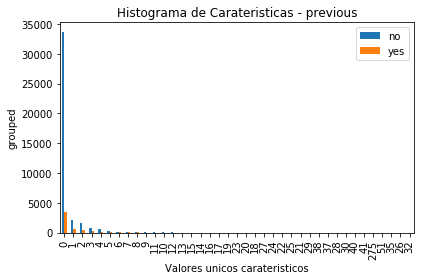

In [77]:
# 15 previous	

Dados_iniciais_obj.plot_histogram_categorical("previous")




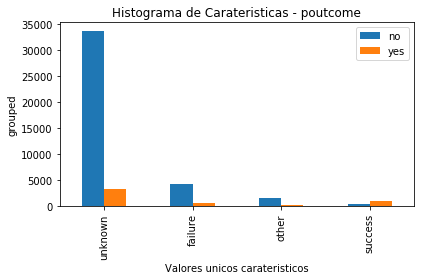

In [78]:
# 16 poutcome

Dados_iniciais_obj.plot_histogram_categorical("poutcome")

In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

print('Estadisticos:')
descrip_stat=col_df.describe()
print (descrip_stat)



Estadisticos:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.

In [80]:
print('Correlação  Canônica entre as variáveis de entrada:')
descrip_corr=col_df.corr()
print (descrip_corr)

Correlação  Canônica entre as variáveis de entrada:
               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


### Como pode ser apreciado na tabela acima  as maiores correlações encontram-se nas variáveis previous e pdays, seguidas de campaing e day. O qual deve ser levado em conta na análise dos dados.

## os dados apesentados nos histogramas anteriores, podem ser tratados a fim de reduzir o erro devido  viés e distribuição. Para isto a seguir apresenta-se a estandarização dos dados

## a estandirização e o codigo de avaliação do modelo apresentada a seguir basea-se no relatorio apresentado em GitHub de ABINAYA MANIMARAN.

In [81]:
# a estandarizacao

def caracteristicas_preprocessadas(df_train, df_test, process_continuous):
    
    to_delete_features = []
    continuous_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']
    categorical_ordered_features = ['marital','default','education', 'housing', 'loan', 'contact','month','poutcome']
    categorical_unordered_features = ['job']
    
    unknown_present_features = ['contact','poutcome','job','education']
    all_present_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous','default','month', 'day', 'housing', 'loan']
    
    ### Delete Features
    for feat in to_delete_features:
        print ("\n--------- deleting feature --------- ",feat)
        del df_train[feat]
        del df_test[feat]
        
    ### Normalization or Standardization of Continuous Features
    if process_continuous == "Standardize":
        print ("\n--------- Standardizing Continuous Features (Mean=0, Standard Deviation=1) --------- ")
        standardization = StandardScaler()
        standardization.fit(df_train[continuous_features])
        print ("Mean: ",standardization.mean_)
        print ("Variance: ",standardization.var_)
        df_train[continuous_features] = standardization.transform(df_train[continuous_features])
        df_test[continuous_features] = standardization.transform(df_test[continuous_features])
    
    elif process_continuous == "Normalize":
        print ("\n--------- Normalizing Continuous Features (Min=0, Max=1) --------- ")
        min_max_scaling = MinMaxScaler()
        min_max_scaling.fit(df_train[continuous_features])
        print (min_max_scaling.data_min_)
        print (min_max_scaling.data_max_)
        df_train[continuous_features] = min_max_scaling.transform(df_train[continuous_features])
        df_test[continuous_features] = min_max_scaling.transform(df_test[continuous_features])
    
        
    ### Label Categorical Ordered Features -- Features used for Imputation (All Present)
    label_dict = {'education':{'primary':0, 'secondary':1, 'tertiary':2},
                  'housing':{'no':0,'yes':1},
                  'loan':{'no':0,'yes':1},
                  'contact':{'telephone':0,'cellular':1},
                  'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12},
                  'default':{'no':0,'yes':1},
                  'marital':{'single':0, 'married':1, 'divorced':2},
                  'poutcome':{'other':0,'failure':1,'success':2}}
    
    for feat in categorical_ordered_features:
        if feat not in unknown_present_features:
            print ("\n--------- Labelling feature Before Imputation --------- ",feat)
            df_train = df_train.replace({feat:label_dict[feat]})
            df_test = df_test.replace({feat:label_dict[feat]})
            print ("Labelled as: ",label_dict[feat])
         
    ### Imputation using SVM
    df_train_impute = df_train.loc[:,df_train.columns.isin(all_present_features)]
    df_test_impute = df_test.loc[:,df_test.columns.isin(all_present_features)]
    
    for feat in unknown_present_features:
        print ("\nFilling Unkowns for Feature: ",feat)
        train_impute = df_train[feat]
        test_impute = df_test[feat]

        train_impute_no_unknowns = train_impute[train_impute != 'unknown']
        train_impute_unknowns = train_impute[train_impute == 'unknown']
        test_impute_unknowns = test_impute[test_impute == 'unknown']
        
        df_train_impute_train_features = df_train_impute.loc[train_impute_no_unknowns.index]
        df_train_impute_test_features = df_train_impute.loc[train_impute_unknowns.index]
        df_test_impute_test_features = df_test_impute.loc[test_impute_unknowns.index]
        
        svm_model = SVC()
        svm_model.fit(df_train_impute_train_features, train_impute_no_unknowns) 
        df_train.loc[df_train_impute_test_features.index, feat] = svm_model.predict(df_train_impute_test_features)
        print ("Train Filled with: ",df_train.loc[df_train_impute_test_features.index, feat].value_counts())
        df_test.loc[df_test_impute_test_features.index, feat] = svm_model.predict(df_test_impute_test_features)
        print ("Test Filled with: ", df_test.loc[df_test_impute_test_features.index, feat].value_counts())
    
    ### Label Categorical Ordered Features -- Features Imputated (Unkowns were Present)
    for feat in categorical_ordered_features:
        if feat in unknown_present_features:
            print ("\n--------- Labelling feature After  Imputation --------- ",feat)
            df_train = df_train.replace({feat:label_dict[feat]})
            df_test = df_test.replace({feat:label_dict[feat]})
            print ("Labelled as: ",label_dict[feat])
            
    ### One hot encoding Categorical Un-ordered Features  
    for feat in categorical_unordered_features:
        print ("\n--------- One Hot Encoding feature --------- ",feat)
        label_encoder = LabelEncoder()
        label_encoder.fit(df_train[feat])
        df_train[feat] = label_encoder.transform(df_train[feat])
        df_test[feat] = label_encoder.transform(df_test[feat])
    
    one_hot_encoder = OneHotEncoder(sparse=False)
    one_hot_encoder.fit(df_train[categorical_unordered_features])
    one_hot_encoded_array_train = one_hot_encoder.transform(df_train[categorical_unordered_features])
    one_hot_encoded_df_train = pd.DataFrame(one_hot_encoded_array_train, index=df_train.index)
    one_hot_encoded_array_test = one_hot_encoder.transform(df_test[categorical_unordered_features])
    one_hot_encoded_df_test = pd.DataFrame(one_hot_encoded_array_test, index=df_test.index)
        
    df_train = pd.concat([df_train,one_hot_encoded_df_train], axis=1) #concatenate old columns with new one hot encoded columns
    df_test = pd.concat([df_test,one_hot_encoded_df_test], axis=1) #concatenate old columns with new one hot encoded columns
    
    df_train = df_train.drop(categorical_unordered_features, axis=1) #Delete columns which were one hot encoded
    df_test = df_test.drop(categorical_unordered_features, axis=1) #Delete columns which were one hot encoded
    
    ### Return pre-processed df
    return df_train, df_test

def classe_preprocessamento(df_train, df_test):
    "\n--------- Labelling Class Information --------- "
    class_col = 'y'
    label_dict = {class_col:{'no':0,'yes':1}}
    df_train = df_train.replace({class_col:label_dict[class_col]})
    df_test = df_test.replace({class_col:label_dict[class_col]})
    return df_train, df_test




In [82]:
#  rotina usada para a avaliação da qualidade do modelo usando criterios ROC e AUC

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

def avaliacao_PerformanceC(df_train_class, predicted_train, predicted_prob_train, df_test_class, predicted_test, predicted_prob_test, roc_y_n):
    ### Confusion Matrix
    confusion_matrix_train = confusion_matrix(df_train_class, predicted_train)
    confusion_matrix_test = confusion_matrix(df_test_class, predicted_test)
    print ("\nTraining Confusion Matrix:\n ", confusion_matrix_train)
    print ("\nTesting Confusion Matrix:\n ", confusion_matrix_test)
 
    ### Accuracy score
    score_train = accuracy_score(df_train_class, predicted_train)
    score_test = accuracy_score(df_test_class, predicted_test)
    print ("\nTraining Accuracy Score: ", score_train)
    print ("\nTesting Accuracy Score: ", score_test)
       
    ### Precision, Recall  
    precision_train = precision_score(df_train_class, predicted_train)
    precision_test = precision_score(df_test_class, predicted_test)
    print ("\nTraining Precision: ", precision_train)
    print ("\nTesting Precision: ", precision_test)
    
    recall_train = recall_score(df_train_class, predicted_train)
    recall_test = recall_score(df_test_class, predicted_test)
    print ("\nTraining Recall: ", recall_train)
    print ("\nTesting Recall: ", recall_test)
    
    ### Classification Report
    print ("\nTrain Classification Report: \n",classification_report(df_train_class, predicted_train))
    print ("\nTest Classification Report: \n",classification_report(df_test_class, predicted_test))

    ### F1 Score
    f1score_train = f1_score(df_train_class, predicted_train)#, average='weighted')
    f1score_test = f1_score(df_test_class, predicted_test)#, average='weighted')
    print ("\nTraining F1score: ", f1score_train)
    print ("\nTesting F1score: ", f1score_test)
    
    f1score_train = f1_score(df_train_class, predicted_train, average='weighted')
    f1score_test = f1_score(df_test_class, predicted_test, average='weighted')
    print ("\nTraining Weigted F1score: ", f1score_train)
    print ("\nTesting Weighted F1score: ", f1score_test)
    
    
    ### ROC-AUC
    if roc_y_n == 'y':
        fpr, tpr, threshold = roc_curve(df_train_class, predicted_prob_train[:,1])
        roc_auc_train = auc(fpr, tpr)
        print ("\nTraining AUC for ROC: ",roc_auc_train)
        plt.figure()
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_train)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc = 'lower right')
        plt.title('Training - Receiver Operating Characteristic')
        
        fpr, tpr, threshold = roc_curve(df_test_class, predicted_prob_test[:,1])
        roc_auc_test = auc(fpr, tpr)
        print ("\nTesting AUC for ROC: ",roc_auc_test)
        plt.figure()
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_test)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc = 'lower right')
        plt.title('Testing - Receiver Operating Characteristic')


## A seguir usamos a estandirização acima dividimos dados para train e test e posteriormente salvamos os dados.

O procedimento a seguir permite:

1. substituir os atributos yes ou no contidos nas variáveis por valores numericos
2. substituir os labels unknow a través do uso de SVM para ajustar a mostra a valores conhecidos
3. permite a criação de subconjuntos de dados de treino e teste
4. separa as variáveis emtre numericas, categoricas ordenadas e categoricas não ordenadas
5. as variáveis categoricas não ordenadas como jobs são sub clasificadas em labels

In [83]:
from sklearn.model_selection import train_test_split

def train_teste_dados(df):
    df_class = pd.DataFrame(df['y'])
    df_features = df.loc[:, df.columns != 'y']
    
    df_features_train, df_features_test, df_class_train,  df_class_test = train_test_split(df_features, df_class)
    
    df_train = pd.concat([df_features_train, df_class_train], axis=1)
    df_test = pd.concat([df_features_test, df_class_test], axis=1)

    return df_train, df_test

df = pd.read_csv('/media/andres/dados1/semantix_teste/desafio/bank-full.csv',sep=';')
df_train,df_test = train_teste_dados(df)
df_train,df_test = caracteristicas_preprocessadas(df_train, df_test,"Standardize")
df_train,df_test = classe_preprocessamento(df_train, df_test)

df_train.to_csv('/media/andres/dados1/semantix_teste/desafio/Data/bank_prepro_standardize_train.csv')
df_test.to_csv('/media/andres/dados1/semantix_teste/desafio/Data/bank_prepro_standardize_test.csv')


--------- Standardizing Continuous Features (Mean=0, Standard Deviation=1) --------- 
Mean:  [4.09767606e+01 1.36344344e+03 2.58540905e+02 2.76321222e+00
 4.02203315e+01 5.84316386e-01 1.57618556e+01]
Variance:  [1.12244004e+02 9.13258250e+06 6.66779170e+04 9.76777843e+00
 1.00499775e+04 5.96024358e+00 6.91930513e+01]

--------- Labelling feature Before Imputation ---------  marital
Labelled as:  {'single': 0, 'married': 1, 'divorced': 2}

--------- Labelling feature Before Imputation ---------  default
Labelled as:  {'no': 0, 'yes': 1}

--------- Labelling feature Before Imputation ---------  housing
Labelled as:  {'no': 0, 'yes': 1}

--------- Labelling feature Before Imputation ---------  loan
Labelled as:  {'no': 0, 'yes': 1}

--------- Labelling feature Before Imputation ---------  month


/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


Labelled as:  {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

Filling Unkowns for Feature:  contact


/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Filled with:  cellular    9889
Name: contact, dtype: int64
Test Filled with:  cellular    3131
Name: contact, dtype: int64

Filling Unkowns for Feature:  poutcome


/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Filled with:  failure    19243
success     6651
other       1843
Name: poutcome, dtype: int64
Test Filled with:  failure    6394
success    2240
other       588
Name: poutcome, dtype: int64

Filling Unkowns for Feature:  job


/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Filled with:  management     100
blue-collar     71
retired         47
technician       6
student          1
Name: job, dtype: int64
Test Filled with:  management     32
blue-collar    23
retired         7
student         1
Name: job, dtype: int64

Filling Unkowns for Feature:  education


/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Filled with:  secondary    1294
tertiary       70
primary        20
Name: education, dtype: int64
Test Filled with:  secondary    439
tertiary      29
primary        5
Name: education, dtype: int64

--------- Labelling feature After  Imputation ---------  education
Labelled as:  {'primary': 0, 'secondary': 1, 'tertiary': 2}

--------- Labelling feature After  Imputation ---------  contact
Labelled as:  {'telephone': 0, 'cellular': 1}

--------- Labelling feature After  Imputation ---------  poutcome
Labelled as:  {'other': 0, 'failure': 1, 'success': 2}

--------- One Hot Encoding feature ---------  job


/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


## Modelos obtidos e avaliação dos mesmos

## Os modelos a seguir são obtidos a partir dos métodos
1. de regressão logistica usando PCA
2. de Perceptron 
3. de Random forrest

## LR com PCA

---Iteration:  0


/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib

---Iteration:  1


/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib

---Iteration:  2


/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib

Cross Validation - C pela Regressao Logistica:  0.5
Cross Validation - Punicao pela Regressao Logistica:  l2

Training Confusion Matrix:
  [[23582  6325]
 [ 1196  2805]]

Testing Confusion Matrix:
  [[7866 2149]
 [ 388  900]]

Training Accuracy Score:  0.7781939365341513

Testing Accuracy Score:  0.7755463151375741

Training Precision:  0.3072289156626506

Testing Precision:  0.29517874713020664

Training Recall:  0.7010747313171707

Testing Recall:  0.6987577639751553

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.79      0.86     29907
           1       0.31      0.70      0.43      4001

   micro avg       0.78      0.78      0.78     33908
   macro avg       0.63      0.74      0.64     33908
weighted avg       0.88      0.78      0.81     33908


Test Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.79      0.86     10015
           1       0.30    

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training AUC for ROC:  0.8233692989465377

Testing AUC for ROC:  0.8223604034941375


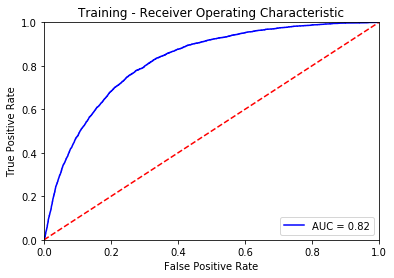

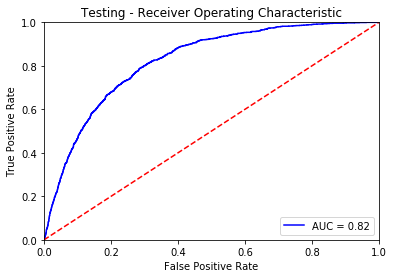

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold


df_train = pd.read_csv('/media/andres/dados1/semantix_teste/desafio/Data/bank_prepro_standardize_train.csv')
df_test = pd.read_csv('/media/andres/dados1/semantix_teste/desafio/Data/bank_prepro_standardize_test.csv')

del df_train['Unnamed: 0']
del df_test['Unnamed: 0']

df_train_class = pd.DataFrame(df_train['y'])    
df_train_features = df_train.loc[:, df_train.columns != 'y']

df_test_class = pd.DataFrame(df_test['y'])
df_test_features = df_test.loc[:, df_test.columns != 'y']
    
# Reducao usando Analise de Componentes Principais
modelo_PCA = PCA(n_components=5)
modelo_PCA.fit(df_train_features)
df_train_features = pd.DataFrame(modelo_PCA.transform(df_train_features))
df_test_features = pd.DataFrame(modelo_PCA.transform(df_test_features))

#Modelo de Regressao Logistica

C_list = np.linspace(0.1, 1, 10)
lista_punicao = ['l1','l2']

skf_model = StratifiedKFold(n_splits=5,shuffle=True)

# minimo de 3 iteracoes
numero_iteracoes = 3
for t in range(0,numero_iteracoes):
    print ("---Iteration: ",t)
    AVG_ACC = np.zeros(shape=[len(C_list),len(lista_punicao)])
    STD_ACC = np.zeros(shape=[len(C_list),len(lista_punicao)])
    
    x_count = 0
    for c_value in C_list:
        
        y_count = 0
        for punicao in lista_punicao:
            
            temp_accuracy_list = []
            for train_subset_index, cv_index in skf_model.split(df_train_features,df_train_class):
                df_train_features_subset = df_train_features.loc[train_subset_index]
                df_train_class_subset = df_train_class.loc[train_subset_index]
                df_train_features_cv = df_train_features.loc[cv_index]
                df_train_class_cv = df_train_class.loc[cv_index]
                
                lr_model = LogisticRegression(penalty=punicao, C=c_value, class_weight= 'balanced')
                lr_model.fit(df_train_features_subset, df_train_class_subset)
                score_value = lr_model.score(df_train_features_cv, df_train_class_cv)
                temp_accuracy_list.append(score_value)
            
            AVG_ACC[x_count,y_count] = np.mean(temp_accuracy_list)
            STD_ACC[x_count,y_count] = np.std(temp_accuracy_list)
            y_count += 1
            
        x_count += 1
    
    if t==0:
        final_AVG_ACC = AVG_ACC
        final_STD_ACC = STD_ACC
    else:
        final_AVG_ACC = np.dstack([final_AVG_ACC, AVG_ACC])
        final_STD_ACC = np.dstack([final_STD_ACC, STD_ACC])
             
final_accuracy_mean_list = np.mean(final_AVG_ACC, axis=2)
max_ind = np.unravel_index(np.argmax(final_accuracy_mean_list, axis=None), final_accuracy_mean_list.shape)

Escolha_C = C_list[max_ind[0]]
Escolha_punicao = lista_punicao[max_ind[1]]
print ("Cross Validation - C pela Regressao Logistica: ",Escolha_C)
print ("Cross Validation - Punicao pela Regressao Logistica: ",Escolha_punicao)

RL_modelo_F = LogisticRegression(penalty=Escolha_punicao, C=Escolha_C, class_weight= 'balanced')
RL_modelo_F.fit(df_train_features, df_train_class)
                     
Predicao_train = RL_modelo_F.predict(df_train_features)
Predicao_test = RL_modelo_F.predict(df_test_features)

Predicao_prob_train = RL_modelo_F.predict_proba(df_train_features)
Predicao_prob_test = RL_modelo_F.predict_proba(df_test_features)

avaliacao_PerformanceC(df_train_class, Predicao_train, Predicao_prob_train, df_test_class, Predicao_test, Predicao_prob_test, 'y')


## Perceptron

---Iteration:  0


/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

---Iteration:  1


/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/lin

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/lin

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/lin

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/lin

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will

Cross Validation - alpha pelo Perceptron:  1e-05
Cross Validation - Punicao pelo Perceptron:  l2


/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they defau


Training Confusion Matrix:
  [[29516   391]
 [ 3380   621]]

Testing Confusion Matrix:
  [[9875  140]
 [1108  180]]

Training Accuracy Score:  0.8887873068302465

Testing Accuracy Score:  0.889586835353446

Training Precision:  0.6136363636363636

Testing Precision:  0.5625

Training Recall:  0.1552111972006998

Testing Recall:  0.13975155279503104

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     29907
           1       0.61      0.16      0.25      4001

   micro avg       0.89      0.89      0.89     33908
   macro avg       0.76      0.57      0.59     33908
weighted avg       0.86      0.89      0.86     33908


Test Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     10015
           1       0.56      0.14      0.22      1288

   micro avg       0.89      0.89      0.89     11303
   macro avg       0.73      0.56      0

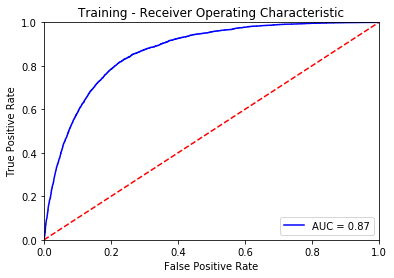

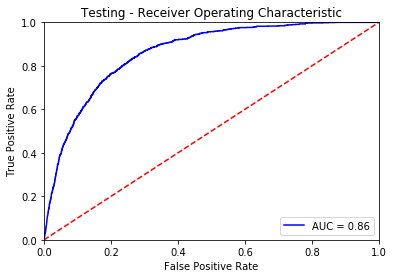

In [85]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import StratifiedKFold

df_train = pd.read_csv('/media/andres/dados1/semantix_teste/desafio/Data/bank_prepro_standardize_train.csv')
df_test = pd.read_csv('/media/andres/dados1/semantix_teste/desafio/Data/bank_prepro_standardize_test.csv')


del df_train['Unnamed: 0']
del df_test['Unnamed: 0']

df_train_class = pd.DataFrame(df_train['y'])    
df_train_features = df_train.loc[:, df_train.columns != 'y']

df_test_class = pd.DataFrame(df_test['y'])
df_test_features = df_test.loc[:, df_test.columns != 'y']
    

# Perceptrao
lista_alpha = np.linspace(0.00001, 1, 15)
lista_punicao = ['l1','l2','elasticnet']

skf_model = StratifiedKFold(n_splits=5,shuffle=True)

numero_iteracoes = 2
for t in range(0,numero_iteracoes):
    print ("---Iteration: ",t)
    AVG_ACC = np.zeros(shape=[len(lista_alpha),len(lista_punicao)])
    STD_ACC = np.zeros(shape=[len(lista_alpha),len(lista_punicao)])
    
    x_count = 0
    for valor_alpha in lista_alpha:
        
        y_count = 0
        for punicao in lista_punicao:
            
            lista_temp_acuidade = []
            for indice_suCbtrain, cv_indice in skf_model.split(df_train_features,df_train_class):
                df_train_features_subset = df_train_features.loc[indice_suCbtrain]
                df_train_class_subset = df_train_class.loc[indice_suCbtrain]
                df_train_features_cv = df_train_features.loc[cv_indice]
                df_train_class_cv = df_train_class.loc[cv_indice]
                
                modelo_perceptrao = Perceptron(penalty=punicao, alpha=valor_alpha, class_weight= 'balanced')
                modelo_perceptrao.fit(df_train_features_subset, df_train_class_subset)
                pontagem = modelo_perceptrao.score(df_train_features_cv, df_train_class_cv)
                lista_temp_acuidade.append(pontagem)
            
            AVG_ACC[x_count,y_count] = np.mean(lista_temp_acuidade)
            STD_ACC[x_count,y_count] = np.std(lista_temp_acuidade)
            y_count += 1
            
        x_count += 1
    
    if t==0:
        final_AVG_ACC = AVG_ACC
        final_STD_ACC = STD_ACC
    else:
        final_AVG_ACC = np.dstack([final_AVG_ACC, AVG_ACC])
        final_STD_ACC = np.dstack([final_STD_ACC, STD_ACC])
             
final_accuracy_mean_list = np.mean(final_AVG_ACC, axis=2)
max_ind = np.unravel_index(np.argmax(final_accuracy_mean_list, axis=None), final_accuracy_mean_list.shape)

Escolha_alpha = lista_alpha[max_ind[0]]
Escolha_Punicao = lista_punicao[max_ind[1]]
print ("Cross Validation - alpha pelo Perceptron: ",Escolha_alpha)
print ("Cross Validation - Punicao pelo Perceptron: ",Escolha_Punicao)

modelo_perceptrao_final = Perceptron(penalty=Escolha_Punicao, alpha=Escolha_alpha, class_weight= 'balanced')
modelo_perceptrao_final = CalibratedClassifierCV(base_estimator=modelo_perceptrao_final,cv=10, method='isotonic')
modelo_perceptrao_final.fit(df_train_features, df_train_class)
                     
Predicao_train = modelo_perceptrao_final.predict(df_train_features)
Predicao_test = modelo_perceptrao_final.predict(df_test_features)

Predicao_prob_train = modelo_perceptrao_final.predict_proba(df_train_features)
Predicao_prob_test  = modelo_perceptrao_final.predict_proba(df_test_features)

avaliacao_PerformanceC(df_train_class, Predicao_train, Predicao_prob_train, df_test_class, Predicao_test, Predicao_prob_test, 'y')


## Floresta Aleátoria

---Iteration:  0


/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py

/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Cross Validation - Numero de Estimadores pela Floresta A :  10


/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training Confusion Matrix:
  [[29897    10]
 [  304  3697]]

Testing Confusion Matrix:
  [[9774  241]
 [ 887  401]]

Training Accuracy Score:  0.9907396484605403

Testing Accuracy Score:  0.90020348580023

Training Precision:  0.9973024008632317

Testing Precision:  0.6246105919003115

Training Recall:  0.9240189952511872

Testing Recall:  0.3113354037267081

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     29907
           1       1.00      0.92      0.96      4001

   micro avg       0.99      0.99      0.99     33908
   macro avg       0.99      0.96      0.98     33908
weighted avg       0.99      0.99      0.99     33908


Test Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     10015
           1       0.62      0.31      0.42      1288

   micro avg       0.90      0.90      0.90     11303
   macro avg       0.77      0

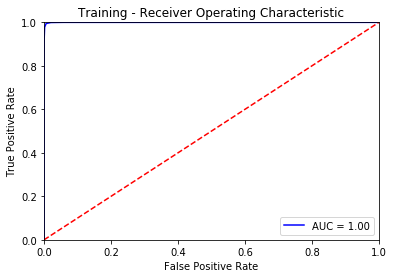

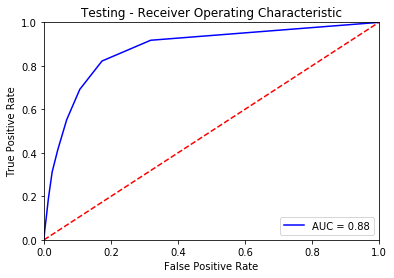

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

df_train = pd.read_csv('/media/andres/dados1/semantix_teste/desafio/Data/bank_prepro_standardize_train.csv')
df_test = pd.read_csv('/media/andres/dados1/semantix_teste/desafio/Data/bank_prepro_standardize_test.csv')


del df_train['Unnamed: 0']
del df_test['Unnamed: 0']

df_train_class = pd.DataFrame(df_train['y'])    
df_train_features = df_train.loc[:, df_train.columns != 'y']

df_test_class = pd.DataFrame(df_test['y'])
df_test_features = df_test.loc[:, df_test.columns != 'y']

# Classificador Aleatorio de floresta
n_estimador_lista = range(10, 50, 5)

skf_model = StratifiedKFold(n_splits=5,shuffle=True)

Numero_iteracoes = 1
for t in range(0,Numero_iteracoes):
    print ("---Iteration: ",t)
    AVG_ACC = np.zeros(shape=[len(n_estimador_lista)])
    STD_ACC = np.zeros(shape=[len(n_estimador_lista)])
    
    x_count = 0
    for k_val in n_estimador_lista:
        Lista_Acuracia_Temp = []
        
        for Indice_subCindice, cv_index in skf_model.split(df_train_features,df_train_class):
            df_train_features_subset = df_train_features.loc[Indice_subCindice]
            df_train_class_subset = df_train_class.loc[Indice_subCindice]
            df_train_features_cv = df_train_features.loc[cv_index]
            df_train_class_cv = df_train_class.loc[cv_index]
        
            BA_modelo = RandomForestClassifier(n_estimators=k_val, class_weight='balanced')
            BA_modelo.fit(df_train_features_subset, df_train_class_subset)
            contagem = BA_modelo.score(df_train_features_cv, df_train_class_cv)
            Lista_Acuracia_Temp.append(contagem)
                
        AVG_ACC[x_count] = np.mean(Lista_Acuracia_Temp)
        STD_ACC[x_count] = np.std(Lista_Acuracia_Temp)
        x_count += 1
    
    if t==0:
        final_AVG_ACC = AVG_ACC
        final_STD_ACC = STD_ACC
    else:
        final_AVG_ACC = np.vstack([final_AVG_ACC, AVG_ACC])
        final_STD_ACC = np.vstack([final_STD_ACC, STD_ACC])
    
Lista_Acc_meia_final = np.mean(final_AVG_ACC, axis=0)
final_k_indice = np.argmax(Lista_Acc_meia_final)

Escolha_k= n_estimador_lista[final_k_indice]
print ("Cross Validation - Numero de Estimadores pela Floresta A : ",Escolha_k)

BA_modelo_final = RandomForestClassifier(n_estimators=Escolha_k, class_weight='balanced')
BA_modelo_final.fit(df_train_features, df_train_class)
                     
Predicao_train = BA_modelo_final.predict(df_train_features)
Predicao_test = BA_modelo_final.predict(df_test_features)

Predicao_prob_train = BA_modelo_final.predict_proba(df_train_features)
Predicao_prob_test = BA_modelo_final.predict_proba(df_test_features)

avaliacao_PerformanceC(df_train_class, Predicao_train, Predicao_prob_train, df_test_class, Predicao_test, Predicao_prob_test, 'y')




# Nesta seção são apresentados alguns resultados analiticos 

## A primeira análise, está associado à tendencia a fazer um emprestimo entre as profissões dos participantes da campanha de adeção via telemarketing.

### Os dados associados à cedito são:  

   1. housing: has housing loan? (binary: "yes","no")
   2. loan: has personal loan? (binary: "yes","no")
   3. default: has credit in default? (binary: "yes","no")
   
   com os quais pretende-se responder à pergnta:
   
 #  1.  Qual profissão tem mais tendência a fazer um emprestimo? De qualtipo?
 
 Primeiramente revisa-se a tendencia dos dados 

In [87]:
## declaração de  classe a usar para os histogramas associados a emprestimos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.close("all")
col_df = pd.read_csv('/media/andres/dados1/semantix_teste/desafio/bank-full.csv',sep=';')
loan=col_df.groupby("loan")
housing=col_df.groupby("housing")
default=col_df.groupby("default")

class Dados_iniciais1:

    def __init__(self, col_df, var):
        self.col_df = col_df
        self.col_df_grouped = var
        self.nome_classe_nao = "no"
        self.nome_classe_sim = "yes"
        self.col_df_grouped_nao = self.col_df_grouped.get_group(self.nome_classe_nao)
        self.col_df_grouped_sim = self.col_df_grouped.get_group(self.nome_classe_sim)

    def plot_histogram_categorical(self, nome_carateristica):
        carateristica_df = pd.DataFrame()
        carateristica_df["no"] = self.col_df_grouped_nao[nome_carateristica].value_counts()
        carateristica_df["yes"] = self.col_df_grouped_sim[nome_carateristica].value_counts()
  
        
        carateristica_df.plot(kind='bar')
        plt.title("Histograma de Carateristicas - "+nome_carateristica)
        plt.ylabel("grouped")
        plt.xlabel("Valores unicos carateristicos")
        plt.tight_layout()


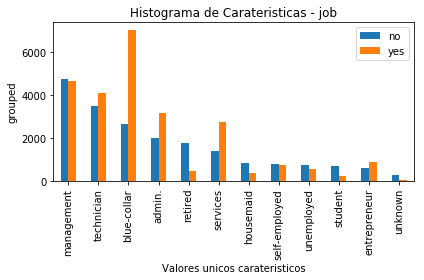

In [88]:
Dados_iniciais_obj = Dados_iniciais1(col_df,housing)
Dados_iniciais_obj.plot_histogram_categorical("job")

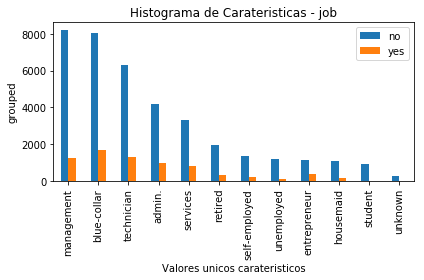

In [89]:
Dados_iniciais_obj = Dados_iniciais1(col_df,loan)
Dados_iniciais_obj.plot_histogram_categorical("job")

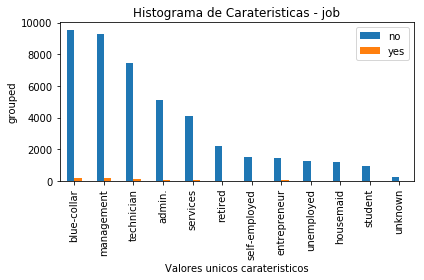

In [90]:
Dados_iniciais_obj = Dados_iniciais1(col_df,default)
Dados_iniciais_obj.plot_histogram_categorical("job")

### A partir dos histogramas acima podemos formular que o  blue-colar, management, e technician tem o mair numero de emprestimos segundo os dados, e que por sua vez este grupo pode ser considerado como o grupo de maior tendência a realizar emprestimos de vivienda e personais.

# 2. Fazendo uma relação entre o número de cotactos  e sucesso da campanha quais são os pontos mais relevantes a serem observados?


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

df_train = pd.read_csv('/media/andres/dados1/semantix_teste/desafio/Data/bank_prepro_standardize_train.csv')
df_test = pd.read_csv('/media/andres/dados1/semantix_teste/desafio/Data/bank_prepro_standardize_test.csv')


del df_train['Unnamed: 0']
del df_test['Unnamed: 0']

df_train_class = pd.DataFrame(df_train['y'])    
df_train_features = df_train.loc[:, df_train.columns != 'y']

# Classificador Aleatorio de floresta
n_estimador_lista = range(10, 50, 5)

skf_model = StratifiedKFold(n_splits=5,shuffle=True)

Numero_iteracoes = 1
for t in range(0,Numero_iteracoes):
    print ("---Iteration: ",t)
    AVG_ACC = np.zeros(shape=[len(n_estimador_lista)])
    STD_ACC = np.zeros(shape=[len(n_estimador_lista)])
    
    x_count = 0
    for k_val in n_estimador_lista:
        Lista_Acuracia_Temp = []
        
        for Indice_subCindice, cv_index in skf_model.split(df_train_features,df_train_class):
            df_train_features_subset = df_train_features.loc[Indice_subCindice]
            df_train_class_subset = df_train_class.loc[Indice_subCindice]
            df_train_features_cv = df_train_features.loc[cv_index]
            df_train_class_cv = df_train_class.loc[cv_index]
        
            BA_modelo = RandomForestClassifier(n_estimators=k_val, class_weight='balanced')
            BA_modelo.fit(df_train_features_subset, df_train_class_subset)
            contagem = BA_modelo.score(df_train_features_cv, df_train_class_cv)
            Lista_Acuracia_Temp.append(contagem)
                
        AVG_ACC[x_count] = np.mean(Lista_Acuracia_Temp)
        STD_ACC[x_count] = np.std(Lista_Acuracia_Temp)
        x_count += 1
    
    if t==0:
        final_AVG_ACC = AVG_ACC
        final_STD_ACC = STD_ACC
    else:
        final_AVG_ACC = np.vstack([final_AVG_ACC, AVG_ACC])
        final_STD_ACC = np.vstack([final_STD_ACC, STD_ACC])
    
Lista_Acc_meia_final = np.mean(final_AVG_ACC, axis=0)
final_k_indice = np.argmax(Lista_Acc_meia_final)

Escolha_k= n_estimador_lista[final_k_indice]
print ("Cross Validation - Numero de Estimadores pela Floresta A : ",Escolha_k)

BA_modelo_final = RandomForestClassifier(n_estimators=Escolha_k, class_weight='balanced')
BA_modelo_final.fit(df_train_features, df_train_class)
        
importance=BA_modelo_final.feature_importances_

std1 = np.std([tree.feature_importances_ for tree in BA_modelo_final.estimators_],
             axis=0)
indices = np.argsort(importance)[::-1]


---Iteration:  0


/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py

/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Cross Validation - Numero de Estimadores pela Floresta A :  10


/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


ranking das Caracteristicas:
1. feature 10 (0.364381)
2. feature 0 (0.089423)
3. feature 4 (0.087144)
4. feature 9 (0.076674)
5. feature 8 (0.076404)
6. feature 14 (0.048223)
7. feature 12 (0.044488)
8. feature 13 (0.037590)
9. feature 11 (0.032004)
10. feature 5 (0.031873)
11. feature 1 (0.018794)
12. feature 2 (0.017459)
13. feature 19 (0.009268)
14. feature 6 (0.009176)
15. feature 24 (0.008162)
16. feature 16 (0.008118)
17. feature 15 (0.007162)
18. feature 7 (0.006198)
19. feature 22 (0.005101)
20. feature 23 (0.003803)
21. feature 21 (0.003656)
22. feature 17 (0.003605)
23. feature 25 (0.003245)
24. feature 20 (0.003202)
25. feature 18 (0.003186)
26. feature 3 (0.001660)


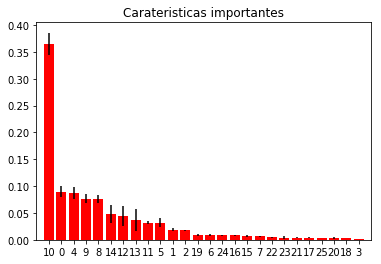

In [92]:
print("ranking das Caracteristicas:")

for f in range(df_train_features_subset.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Carateristicas importantes")
plt.bar(range(df_train_features_subset.shape[1]), importance[indices],
       color="r", yerr=std1[indices], align="center")
plt.xticks(range(df_train_features_subset.shape[1]), indices)
plt.xlim([-1, df_train_features_subset.shape[1]])
plt.show()

# A través da análise ao modelo pode se corroborar a hipotese apresentada  em  [1]  onde se se determina como um dos mais importantes elementos da toma de decisão dos clientes está associada ao tempo da ligação; em [1] determinam que um tempo superior a 8 seg, garante o maior numero de adesões à campanha.

## Por outra parte pode se ver que outros elementos importantes para a adeção à campanha estão associados ao balance idade o dia e o mês de contacto.  Por outra parte os clientes que se aderem à campanha estão ubicados maioritariamente no setor de serviço, desempregados, auto-empregados ou blue-collar.

[1] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

# 3. Baseando-se nos resultados de adeção  desta campanha  cual é o número medio e máximo que você indica para otimizar a adesão?

Text(0.5, 0, 'Numero de Contactos ao Cliente')

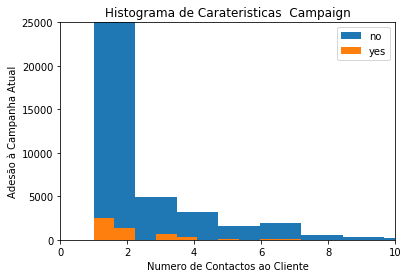

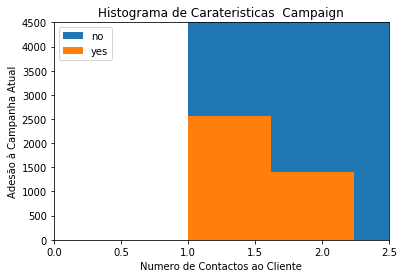

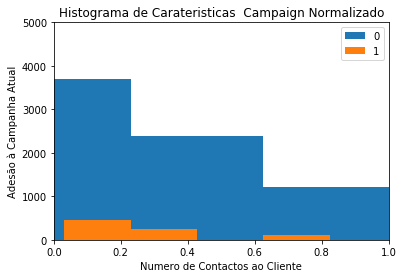

In [93]:
train_col_df = pd.read_csv('/media/andres/dados1/semantix_teste/desafio/Data/bank_prepro_standardize_train.csv')

col_df = pd.read_csv('/media/andres/dados1/semantix_teste/desafio/bank-full.csv',sep=';')




class Dados_iniciais2:

    def __init__(self, col_df, var,val_n,val_p):
        self.col_df = col_df
        self.col_df_grouped = var
        self.nome_classe_nao = val_n
        self.nome_classe_sim = val_p
        self.col_df_grouped_nao = self.col_df_grouped.get_group(self.nome_classe_nao)
        self.col_df_grouped_sim = self.col_df_grouped.get_group(self.nome_classe_sim)


    def plot_histograma_continuo(self, nome_carateristica, bin_tamanho):
        plt.figure()
        plt.hist(self.col_df_grouped_nao[nome_carateristica], bins=bin_tamanho, label=self.nome_classe_nao)
        plt.hist(self.col_df_grouped_sim[nome_carateristica], bins=bin_tamanho, label=self.nome_classe_sim)
        plt.legend()
        plt.title("Histograma de Carateristicas - "+nome_carateristica)
        plt.xlabel("Valores Carateristicos")
        plt.ylabel("grouped")
        
y=col_df.groupby("y")
val_n=col_df.nome_classe_nao = "no"
val_p=col_df.nome_classe_sim = "yes"        
        
Dados_iniciais_obj = Dados_iniciais2(col_df,y,val_n,val_p)

Dados_iniciais_obj.plot_histograma_continuo("campaign", 50)
plt.axis([ 0, 10, 0, 25000])
plt.title("Histograma de Carateristicas  Campaign")
plt.ylabel("Adesão à Campanha Atual")
plt.xlabel("Numero de Contactos ao Cliente")

Dados_iniciais_obj.plot_histograma_continuo("campaign", 50)
plt.axis([ 0, 2.5, 0, 4500])
plt.title("Histograma de Carateristicas  Campaign")
plt.ylabel("Adesão à Campanha Atual")
plt.xlabel("Numero de Contactos ao Cliente")

y=train_col_df.groupby("y")
val_n=train_col_df.nome_classe_nao = 0
val_p=train_col_df.nome_classe_sim = 1
Dados_iniciais_obj = Dados_iniciais2(train_col_df,y,val_n,val_p)

Dados_iniciais_obj.plot_histograma_continuo("campaign", 50)
plt.axis([ 0, 1., 0, 5000])
plt.title("Histograma de Carateristicas  Campaign Normalizado")
plt.ylabel("Adesão à Campanha Atual")
plt.xlabel("Numero de Contactos ao Cliente")

## deacordo com os dados e a frequencia apresentada na tabela abaixo, pode-se concluir que o maior numero de adesões ocorre um numero de ligaçãoes inferior a 6.

## Portanto, recomenda-se em media ligar 4 vezes e no máximo 6.

In [94]:
Camp=col_df.groupby(["campaign","y"])
Camp_count=Camp['y'].count().unstack()
Camp_count.head(15)

y,no,yes
campaign,,
1,14983.0,2561.0
2,11104.0,1401.0
3,4903.0,618.0
4,3205.0,317.0
5,1625.0,139.0
6,1199.0,92.0
7,688.0,47.0
8,508.0,32.0
9,306.0,21.0


# 4. O resultado da campanha anterior tem relevância na campanha atual?

## Para isto usaremos os resultados apresentados em na resposta à pergunta 1.

## Usando os valores 9 a 16 deacordo com o bank-names.csv fornecido com o problema, como valores de entrada no modelo.  E  y (17) como saída do mesmo. 

ranking das Caracteristicas:
1. feature 10 (0.364381)
2. feature 0 (0.089423)
3. feature 4 (0.087144)
4. feature 9 (0.076674)
5. feature 8 (0.076404)
6. feature 14 (0.048223)
7. feature 12 (0.044488)
8. feature 13 (0.037590)
9. feature 11 (0.032004)
10. feature 5 (0.031873)
11. feature 1 (0.018794)
12. feature 2 (0.017459)
13. feature 19 (0.009268)
14. feature 6 (0.009176)
15. feature 24 (0.008162)
16. feature 16 (0.008118)
17. feature 15 (0.007162)
18. feature 7 (0.006198)
19. feature 22 (0.005101)
20. feature 23 (0.003803)
21. feature 21 (0.003656)
22. feature 17 (0.003605)
23. feature 25 (0.003245)
24. feature 20 (0.003202)
25. feature 18 (0.003186)
26. feature 3 (0.001660)


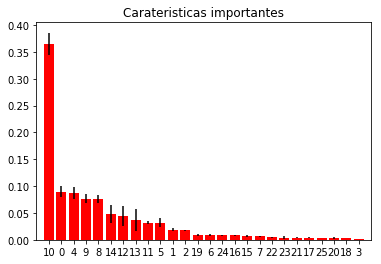

In [95]:
print("ranking das Caracteristicas:")

for f in range(df_train_features_subset.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Carateristicas importantes")
plt.bar(range(df_train_features_subset.shape[1]), importance[indices],
       color="r", yerr=std1[indices], align="center")
plt.xticks(range(df_train_features_subset.shape[1]), indices)
plt.xlim([-1, df_train_features_subset.shape[1]])
plt.show()

## Levando em conta o anteriora tabela acima pode ser reescrita como:

1. duration
5. month
6. pdays
7. poutcome
9. previous
10. campaign

## sendo confirmado que os dados mais relevantes associados à campanha anterior são a duração o mês de contacto e a ligação poutcome. Por outra parte campaign contes a informação do ultimo contacto portanto a informação está correlata com previous.

# 6. Quais são as caracteristicas mais prominentes de um cliente para que possua um emprestimo imobiliario

## Para este fim creamos um modelo de regressão entre a variável housing que inclui o credito  imobiliario e as variáveis caracteristicas incluidas as de jobs, deacordo com  a lassificação do item 3 e dos dados standarizados e salvos como bank_prepro_standardize_train.csv

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

df_train = pd.read_csv('/media/andres/dados1/semantix_teste/desafio/Data/bank_prepro_standardize_train.csv')
df_test = pd.read_csv('/media/andres/dados1/semantix_teste/desafio/Data/bank_prepro_standardize_test.csv')


del df_train['Unnamed: 0']
del df_test['Unnamed: 0']

df_train_class = pd.DataFrame(df_train['housing'])    
df_train_features = df_train.loc[:, df_train.columns != 'housing']

# Classificador Aleatorio de floresta
n_estimador_lista = range(10, 50, 5)

skf_model = StratifiedKFold(n_splits=5,shuffle=True)

Numero_iteracoes = 1
for t in range(0,Numero_iteracoes):
    print ("---Iteration: ",t)
    AVG_ACC = np.zeros(shape=[len(n_estimador_lista)])
    STD_ACC = np.zeros(shape=[len(n_estimador_lista)])
    
    x_count = 0
    for k_val in n_estimador_lista:
        Lista_Acuracia_Temp = []
        
        for Indice_subCindice, cv_index in skf_model.split(df_train_features,df_train_class):
            df_train_features_subset = df_train_features.loc[Indice_subCindice]
            df_train_class_subset = df_train_class.loc[Indice_subCindice]
            df_train_features_cv = df_train_features.loc[cv_index]
            df_train_class_cv = df_train_class.loc[cv_index]
        
            BA_modelo = RandomForestClassifier(n_estimators=k_val, class_weight='balanced')
            BA_modelo.fit(df_train_features_subset, df_train_class_subset)
            contagem = BA_modelo.score(df_train_features_cv, df_train_class_cv)
            Lista_Acuracia_Temp.append(contagem)
                
        AVG_ACC[x_count] = np.mean(Lista_Acuracia_Temp)
        STD_ACC[x_count] = np.std(Lista_Acuracia_Temp)
        x_count += 1
    
    if t==0:
        final_AVG_ACC = AVG_ACC
        final_STD_ACC = STD_ACC
    else:
        final_AVG_ACC = np.vstack([final_AVG_ACC, AVG_ACC])
        final_STD_ACC = np.vstack([final_STD_ACC, STD_ACC])
    
Lista_Acc_meia_final = np.mean(final_AVG_ACC, axis=0)
final_k_indice = np.argmax(Lista_Acc_meia_final)

Escolha_k= n_estimador_lista[final_k_indice]
print ("Cross Validation - Numero de Estimadores pela Floresta A : ",Escolha_k)

BA_modelo_final = RandomForestClassifier(n_estimators=Escolha_k, class_weight='balanced')
BA_modelo_final.fit(df_train_features, df_train_class)
        
importance=BA_modelo_final.feature_importances_

std1 = np.std([tree.feature_importances_ for tree in BA_modelo_final.estimators_],
             axis=0)
indices = np.argsort(importance)[::-1]


---Iteration:  0


/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py

/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Cross Validation - Numero de Estimadores pela Floresta A :  10


/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


ranking das Caracteristicas:
1. feature 8 (0.184105)
2. feature 13 (0.144132)
3. feature 9 (0.113372)
4. feature 4 (0.103388)
5. feature 0 (0.103289)
6. feature 7 (0.096058)
7. feature 10 (0.044187)
8. feature 11 (0.035733)
9. feature 1 (0.022019)
10. feature 12 (0.020905)
11. feature 2 (0.019393)
12. feature 16 (0.013719)
13. feature 14 (0.013519)
14. feature 5 (0.013452)
15. feature 24 (0.009451)
16. feature 20 (0.009287)
17. feature 19 (0.008898)
18. feature 6 (0.008221)
19. feature 15 (0.007755)
20. feature 22 (0.005522)
21. feature 23 (0.005393)
22. feature 21 (0.004371)
23. feature 25 (0.004029)
24. feature 17 (0.003419)
25. feature 18 (0.003378)
26. feature 3 (0.003005)


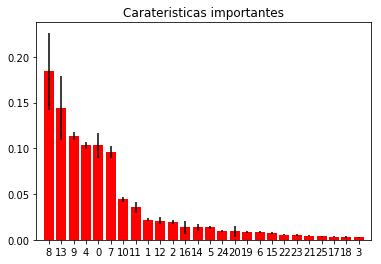

In [97]:
print("ranking das Caracteristicas:")

for f in range(df_train_features_subset.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Carateristicas importantes")
plt.bar(range(df_train_features_subset.shape[1]), importance[indices],
       color="r", yerr=std1[indices], align="center")
plt.xticks(range(df_train_features_subset.shape[1]), indices)
plt.xlim([-1, df_train_features_subset.shape[1]])
plt.show()

# deacordo ao modelo e os dados analizados, pode se concluir que as 5 variáveis mais importantes associadas ao credito de vivienda são:

1. Month
2. Outcome
3. duration
4. balance
5. age


# 5. Qual o fator  determinante para que o banco exija  um seguro de credito

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

df_train = pd.read_csv('/media/andres/dados1/semantix_teste/desafio/Data/bank_prepro_standardize_train.csv')
df_test = pd.read_csv('/media/andres/dados1/semantix_teste/desafio/Data/bank_prepro_standardize_test.csv')


del df_train['Unnamed: 0']
del df_test['Unnamed: 0']

df_train_class = pd.DataFrame(df_train['default'])    
df_train_features = df_train.loc[:, df_train.columns != 'default']

# Classificador Aleatorio de floresta
n_estimador_lista = range(10, 50, 5)

skf_model = StratifiedKFold(n_splits=5,shuffle=True)

Numero_iteracoes = 1
for t in range(0,Numero_iteracoes):
    print ("---Iteration: ",t)
    AVG_ACC = np.zeros(shape=[len(n_estimador_lista)])
    STD_ACC = np.zeros(shape=[len(n_estimador_lista)])
    
    x_count = 0
    for k_val in n_estimador_lista:
        Lista_Acuracia_Temp = []
        
        for Indice_subCindice, cv_index in skf_model.split(df_train_features,df_train_class):
            df_train_features_subset = df_train_features.loc[Indice_subCindice]
            df_train_class_subset = df_train_class.loc[Indice_subCindice]
            df_train_features_cv = df_train_features.loc[cv_index]
            df_train_class_cv = df_train_class.loc[cv_index]
        
            BA_modelo = RandomForestClassifier(n_estimators=k_val, class_weight='balanced')
            BA_modelo.fit(df_train_features_subset, df_train_class_subset)
            contagem = BA_modelo.score(df_train_features_cv, df_train_class_cv)
            Lista_Acuracia_Temp.append(contagem)
                
        AVG_ACC[x_count] = np.mean(Lista_Acuracia_Temp)
        STD_ACC[x_count] = np.std(Lista_Acuracia_Temp)
        x_count += 1
    
    if t==0:
        final_AVG_ACC = AVG_ACC
        final_STD_ACC = STD_ACC
    else:
        final_AVG_ACC = np.vstack([final_AVG_ACC, AVG_ACC])
        final_STD_ACC = np.vstack([final_STD_ACC, STD_ACC])
    
Lista_Acc_meia_final = np.mean(final_AVG_ACC, axis=0)
final_k_indice = np.argmax(Lista_Acc_meia_final)

Escolha_k= n_estimador_lista[final_k_indice]
print ("Cross Validation - Numero de Estimadores pela Floresta A : ",Escolha_k)

BA_modelo_final = RandomForestClassifier(n_estimators=Escolha_k, class_weight='balanced')
BA_modelo_final.fit(df_train_features, df_train_class)
        
importance=BA_modelo_final.feature_importances_

std1 = np.std([tree.feature_importances_ for tree in BA_modelo_final.estimators_],
             axis=0)
indices = np.argsort(importance)[::-1]


---Iteration:  0


/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py

/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Cross Validation - Numero de Estimadores pela Floresta A :  10


/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


ranking das Caracteristicas:
1. feature 3 (0.423467)
2. feature 9 (0.094725)
3. feature 0 (0.092952)
4. feature 7 (0.075379)
5. feature 10 (0.046276)
6. feature 8 (0.043816)
7. feature 5 (0.035456)
8. feature 12 (0.024846)
9. feature 1 (0.020651)
10. feature 2 (0.019441)
11. feature 4 (0.015321)
12. feature 13 (0.013997)
13. feature 11 (0.012185)
14. feature 24 (0.012110)
15. feature 16 (0.010073)
16. feature 19 (0.008738)
17. feature 22 (0.007752)
18. feature 15 (0.007128)
19. feature 14 (0.006958)
20. feature 17 (0.006655)
21. feature 21 (0.005454)
22. feature 6 (0.004997)
23. feature 25 (0.004825)
24. feature 18 (0.003109)
25. feature 20 (0.002754)
26. feature 23 (0.000933)


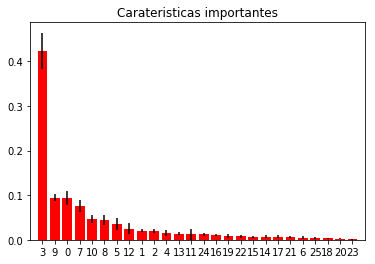

In [99]:
print("ranking das Caracteristicas:")

for f in range(df_train_features_subset.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Carateristicas importantes")
plt.bar(range(df_train_features_subset.shape[1]), importance[indices],
       color="r", yerr=std1[indices], align="center")
plt.xticks(range(df_train_features_subset.shape[1]), indices)
plt.xlim([-1, df_train_features_subset.shape[1]])
plt.show()

# Analizando também o modelo de balance vs as outras carateristica também podemos inferir algunas informações relevantes, dado que  o cliente com saldo negativo anuual pode também representar um risco e precisar de um seguro de emprestimo. No ponto 6. pode ser visto que  o balance é um ponto relevante para adquirir um emprestimo. Dado isto e a imformação acima, pode se concluir que as 5 variáveis mais importantes associadas ao seguro para credito são:

1. balance   (3)
2. age       (0) 
3. loan      (5)
4. marital   (1)
5. education (2) 